

# STOCK MARKET ANALYSIS

**STOCK** - A stock is a type of security that entitles the holder a fraction of ownership in a     company. Through the ownership of this stock, the holder may be granted a portion of a company's earnings, distributed as dividends. Broadly speaking, there are two main types of stocks, common and preferred. Common stockholders have the right to receive dividends and vote in shareholder meetings, while preferred shareholders have limited or no voting rights. Preferred stockholders typically receive higher dividend payouts, and in the event of a liquidation, a greater claim on assets than common stockholders.

**STOCK MARKET** - The stock market broadly refers to the collection of exchanges and other venues where the buying, selling, and issuance of shares of publicly held companies take place.

**STOCK MARKET ANALYSIS** - Stock market analysis enables investors to identify the intrinsic worth of a security even before investing in it. Studying and evaluating past and current data helps investors and traders to gain an edge in the markets to make informed decisions.

The stock price of the company reflects the net evaluation of the company and also gives a little insight into its performance. These stocks are traded on exchanges and their prices are constantly changing due to their demand and supply in the market. If a stock is in high demand and low in supply i.e. more people want to buy it and fewer people are willing to sell it then the price for the stock will go up and similarly if the stock is in low demand and high on supply which means people more people are ready to sell it but fewer people are willing to buy it then its prices go down.

The sudden increase in the demand for the stock can be due to various reasons including positive news about the company or an announcement from the company. After a period of time when the demand for the stock vanishes its prices slowly creep down as the investor loses interest in it. These stock prices going up and down is an iterative process and repeated. This volatility of stock makes investors nervous while investing in a company. So to understand the risk associated with it there must be a proper analysis of stock before buying it. In this article, we would try to explore just the tip of the iceberg for the stock market analysis as technical analysis of the stock is a vast field. 

We are demonstrating the analysis in Python.

step 1: Import Dataset

step 2: Resampling

step 3: Moving Windows

step 4: Volatility


# Step 1: Importing Datasets


Before we play with stock data, we need to get it in some workable format. Stock data can be obtained from **Yahoo! Finance, Google Finance**, or a number of other sources, and the pandas package provides easy access to Yahoo! Finance and Google Finance data, along with other sources. In this lecture, we will get our data from Yahoo! Finance.

In [1]:
import pandas as pd

**PANDAS:** Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays. As one of the most popular data wrangling packages, Pandas works well with many other data science modules inside the Python ecosystem, and is typically included in every Python distribution, from those that come with your operating system to commercial vendor distributions like ActiveState’s ActivePython. 

In [2]:
!pip install pandas_datareader

In [3]:
import datetime
import pandas_datareader as pdr

**PANDAS DATAREADER :** Pandas Datareader is a Python package that allows us to create a pandas DataFrame object by using various data sources from the internet. It is popularly used for working with realtime stock price datasets.

**DATETIME :** The datetime module supplies classes for manipulating dates and times.While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

In [4]:
nvda = pdr.get_data_yahoo('NVDA', 
                          start=datetime.datetime(2004, 1, 1), 
                          end=datetime.datetime(2019, 9, 15))

In [5]:
qcom = pdr.get_data_yahoo('QCOM',
                         start=datetime.datetime(2004,1,1),
                         end=datetime.datetime(2019,9,15))

In [6]:
intc = pdr.get_data_yahoo('INTC',
                         start=datetime.datetime(2004,1,1),
                         end=datetime.datetime(2019,9,15))

In [7]:
ibm = pdr.get_data_yahoo('IBM',
                        start=datetime.datetime(2004,1,1),
                        end=datetime.datetime(2019,9,15))

In [8]:
amd = pdr.get_data_yahoo('AMD',
                        start=datetime.datetime(2004,1,1),
                        end=datetime.datetime(2019,9,15))

In [9]:
amd.head(n=3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,15.20,14.81,15.20,14.90,7395900,14.90
2004-01-02,15.11,14.77,15.10,14.86,8220700,14.86
2004-01-05,15.27,15.01,15.05,15.20,9156000,15.20


**Volume** measures the number of shares traded in a stock or contracts traded in futures or options. Volume can be an indicator of market strength, as rising markets on increasing volume are typically viewed as strong and healthy. When prices fall on increasing volume, the trend is gathering strength to the downside.The more active the share, the higher would be its volume. For example, you decide to buy 100 shares of Amara Raja Batteries at 485, and I decide to sell 100 shares of Amara Raja Batteries at 485.

The adjusted closing price(**Adj Close**) amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.

**Adj Close vs Close:** The closing price of a stock is the price of that stock at the close of the trading day. The adjusted closing price is a more complex analysis that uses the closing price as a starting point, but it takes into account factors such as dividends, stock splits and new stock offerings to determine a value.A stock's adjusted closing price gives you all the information you need to keep an eye on your stock. You can use unadjusted closing prices to calculate returns, but adjusted closing prices save you some time and effort. 

In [10]:
amd.tail(n=3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-11,30.43,29.510000,30.379999,29.760000,50631700,29.760000
2019-09-12,30.84,29.950001,30.080000,30.209999,53618300,30.209999
2019-09-13,30.85,29.950001,30.270000,30.690001,47758800,30.690001


In [11]:
ibm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-09,136.730408,134.282990,134.407272,136.328873,4421024.0,121.890717
2019-09-10,139.063095,136.673035,136.711288,138.671127,5208766.0,123.984894
2019-09-11,138.738052,136.434036,138.479919,137.284897,4047706.0,122.745499
2019-09-12,137.705551,135.640533,137.695984,137.304016,2620648.0,122.762566
2019-09-13,138.288712,136.959854,137.973236,137.351822,2308104.0,122.805298


In [12]:
type(nvda), type(amd)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [13]:
ibm.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3953.000000,3953.000000,3953.000000,3953.000000,3.953000e+03,3953.000000
mean,132.588092,130.595847,131.541983,131.613633,5.912253e+06,95.165105
std,36.791553,36.528904,36.666262,36.663092,3.226218e+06,30.941019
min,70.449333,66.443596,69.340347,68.585083,1.074765e+06,43.183418
25%,98.470360,95.783936,96.826004,97.160614,3.825850e+06,63.544498
50%,134.799240,132.963669,133.776291,133.881454,5.076238e+06,105.996323
75%,160.086044,157.839386,158.938812,158.938812,6.986652e+06,121.568146
max,206.405350,204.875717,205.908218,206.309753,3.218615e+07,147.156342


In [14]:
intc.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3953.000000,3953.000000,3953.000000,3953.000000,3.953000e+03,3953.000000
mean,28.267673,27.681890,27.972623,27.978449,4.841253e+07,21.958604
std,9.682255,9.520192,9.600795,9.609658,2.745320e+07,10.567173
min,12.630000,12.050000,12.170000,12.080000,5.893800e+06,8.238988
25%,21.420000,21.010000,21.200001,21.190001,2.693170e+07,14.466434
50%,24.980000,24.490000,24.750000,24.760000,4.466010e+07,17.218458
75%,33.830002,33.139999,33.470001,33.520000,6.300570e+07,27.934435
max,59.590000,58.500000,58.889999,58.820000,3.093476e+08,54.926643


In [15]:
qcom.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3953.000000,3953.000000,3953.000000,3953.000000,3.953000e+03,3953.000000
mean,53.282861,52.113945,52.689065,52.709240,1.507803e+07,41.267741
std,13.110786,13.062854,13.082458,13.087794,8.909673e+06,13.048260
min,27.400000,26.665001,26.750000,26.809999,2.451300e+06,18.276890
25%,42.189999,40.980000,41.599998,41.540001,9.626200e+06,29.416021
50%,52.799999,51.759998,52.299999,52.220001,1.317310e+07,41.212658
75%,63.700001,62.529999,63.099998,63.200001,1.793900e+07,51.425941
max,90.339996,87.059998,87.760002,89.290001,1.560193e+08,83.397049


In [16]:
nvda.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [17]:
nvda.index, amd.index

(DatetimeIndex(['2003-12-31', '2004-01-02', '2004-01-05', '2004-01-06',
                '2004-01-07', '2004-01-08', '2004-01-09', '2004-01-12',
                '2004-01-13', '2004-01-14',
                ...
                '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05',
                '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11',
                '2019-09-12', '2019-09-13'],
               dtype='datetime64[ns]', name='Date', length=3953, freq=None),
 DatetimeIndex(['2003-12-31', '2004-01-02', '2004-01-05', '2004-01-06',
                '2004-01-07', '2004-01-08', '2004-01-09', '2004-01-12',
                '2004-01-13', '2004-01-14',
                ...
                '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05',
                '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11',
                '2019-09-12', '2019-09-13'],
               dtype='datetime64[ns]', name='Date', length=3953, freq=None))

In [18]:
nvda.shape

(3953, 6)

In [19]:
ibm.shape

(3953, 6)

# Time Series Data

A time series is a sequence of numerical data points taken at successive equally spaced points in time.
In investing, a time series tracks the movement of stock price, over a specified period of time.

**Time Series Analysis:** Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly. However, this type of analysis is not merely the act of collecting data over time. What sets time series data apart from other data is that the analysis can show how variables change over time. 

Time series analysis typically requires a large number of data points to ensure consistency and reliability. An extensive data set ensures you have a representative sample size and that analysis can cut through noisy data. It also ensures that any trends or patterns discovered are not outliers and can account for seasonal variance. Additionally, time series data can be used for forecasting—predicting future data based on historical data.

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

**MATPLOTLIB:** Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. Developers can also use matplotlib’s APIs (Application Programming Interfaces) to embed plots in GUI applications.
A Python matplotlib script is structured so that a few lines of code are all that is required in most instances to generate a visual data plot.   

In [21]:
import matplotlib.dates as mdates

**DateFormatter** class is used to format a tick (in seconds since the epoch) with a string of strftime format. Its base class is matplotlib.ticker.Formatter.

**YearLocator**: Locate years that are multiples of base.

**tick_params()** is used to change the appearance of ticks, tick labels, and gridlines.

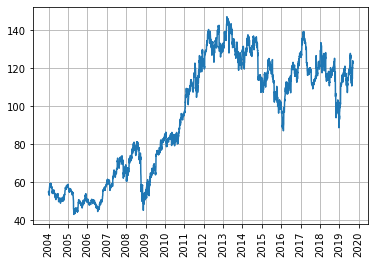

In [22]:
plt.plot(ibm.index, ibm['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

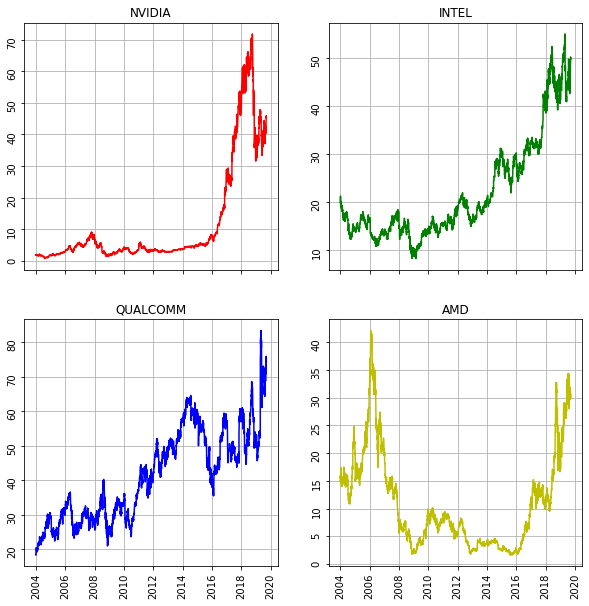

In [23]:
#Subplots
f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(nvda.index, nvda['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('NVIDIA');

ax[0,1].plot(intc.index, intc['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('INTEL');

ax[1,0].plot(qcom.index, qcom['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('QUALCOMM');

ax[1,1].plot(amd.index, amd['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('AMD');

# Zooming-in

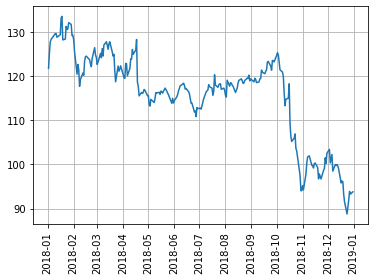

In [24]:
ibm_18 = ibm.loc[pd.Timestamp('2018-01-01'):pd.Timestamp('2018-12-31')]
plt.plot(ibm_18.index, ibm_18['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

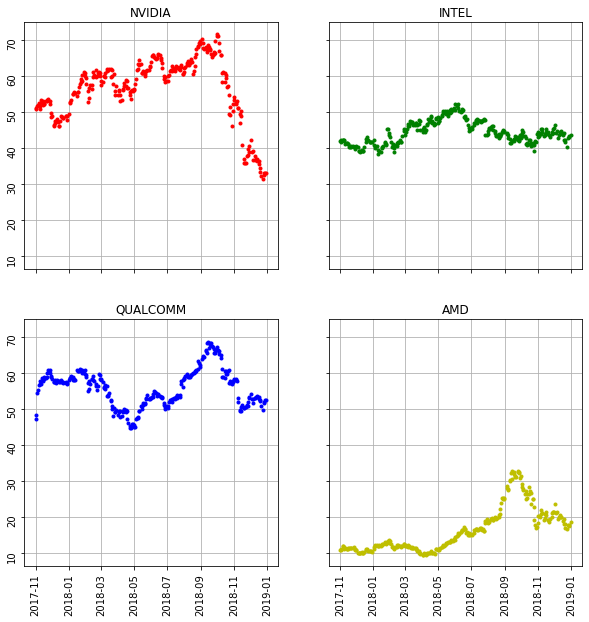

In [25]:
#Subplots
f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

nvda_18 = nvda.loc[pd.Timestamp('2017-11-01'):pd.Timestamp('2018-12-31')]
ax[0,0].plot(nvda_18.index, nvda_18['Adj Close'], '.', color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('NVIDIA');

intc_18 = intc.loc[pd.Timestamp('2017-11-01'):pd.Timestamp('2018-12-31')]
ax[0,1].plot(intc_18.index, intc_18['Adj Close'], '.' ,color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('INTEL');

qcom_18 = qcom.loc[pd.Timestamp('2017-11-01'):pd.Timestamp('2018-12-31')]
ax[1,0].plot(qcom_18.index, qcom_18['Adj Close'], '.' ,color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('QUALCOMM');

amd_18 = amd.loc[pd.Timestamp('2017-11-01'):pd.Timestamp('2018-12-31')]
ax[1,1].plot(amd_18.index, amd_18['Adj Close'], '.' ,color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('AMD');

# Step 2: Resampling (Quarterly)

**Resampling :**
Resampling basically means representing the data with a different frequency. Assume we have a temperature sensor which takes measurements every minute. If we do not need to have a minute-level precision, we can take the average of 60 minute measurements in an hour and show the changes in the temperature hourly. This is down-sampling which means converting to a lower frequency.
Resampling can be done using resample() or asfreq() functions.

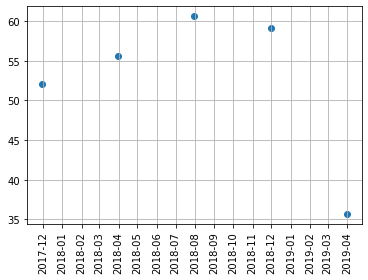

In [26]:
monthly_nvda_18 = nvda_18.resample('4M').mean()
plt.scatter(monthly_nvda_18.index, monthly_nvda_18['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

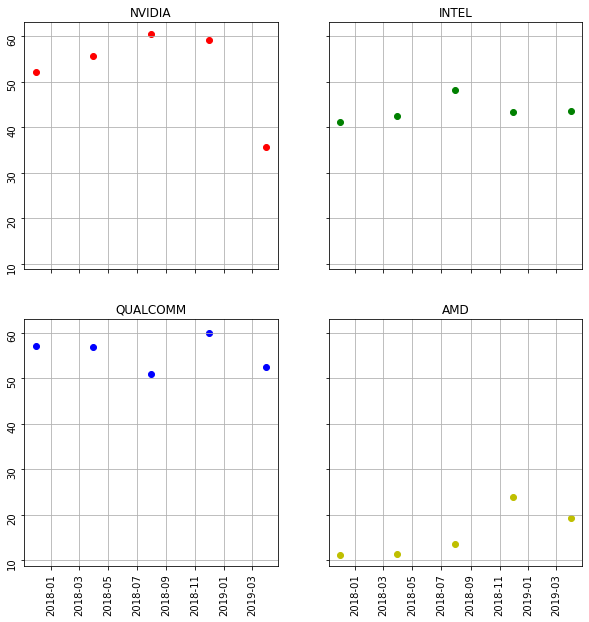

In [27]:
#Subplots
f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

monthly_nvda_18 = nvda_18.resample('4M').mean()
ax[0,0].scatter(monthly_nvda_18.index, monthly_nvda_18['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('NVIDIA');

monthly_intc_18 = intc_18.resample('4M').mean()
ax[0,1].scatter(monthly_intc_18.index, monthly_intc_18['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('INTEL');

monthly_qcom_18 = qcom_18.resample('4M').mean()
ax[1,0].scatter(monthly_qcom_18.index, monthly_qcom_18['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('QUALCOMM');

monthly_amd_18 = amd_18.resample('4M').mean()
ax[1,1].scatter(monthly_amd_18.index, monthly_amd_18['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('AMD');

# Step 2: Resampling (Weekly)

In [28]:
ibm_19 = ibm.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]

In [29]:
weekly_ibm_19 = ibm_19.resample('W').mean()
weekly_ibm_19.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-20,117.366158,115.896271,116.245218,116.959846,4808200.50,100.965528
2019-01-27,125.824570,123.257648,124.323616,124.739485,11544283.25,107.681290
2019-02-03,129.095602,127.441681,128.261952,128.393884,4934128.40,110.835947
2019-02-10,129.225621,127.608031,128.185466,128.864243,4576124.40,111.755267
2019-02-17,130.986615,129.785849,130.231357,130.414917,3618909.00,113.892305


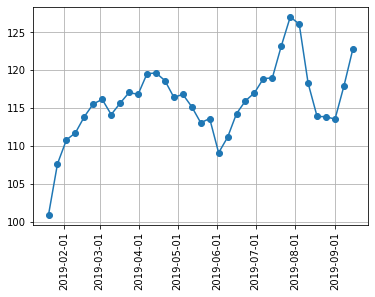

In [30]:
plt.plot(weekly_ibm_19.index, weekly_ibm_19['Adj Close'], '-o')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

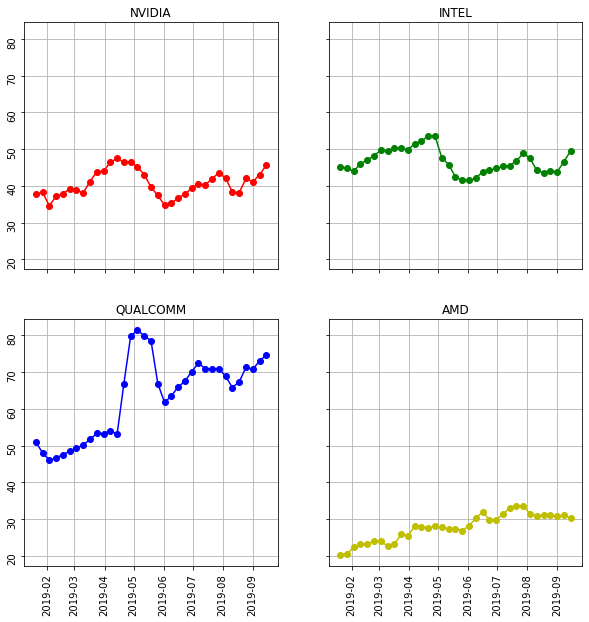

In [31]:
#Subplots
nvda_19 = nvda.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_nvda_19 = nvda_19.resample('W').mean()

intc_19 = intc.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_intc_19 = intc_19.resample('W').mean()

qcom_19 = qcom.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_qcom_19 = qcom_19.resample('W').mean()

amd_19 = amd.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_amd_19 = amd_19.resample('W').mean()

f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
ax[0,0].plot(weekly_nvda_19.index, weekly_nvda_19['Adj Close'], '-o', color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('NVIDIA');

ax[0,1].plot(weekly_intc_19.index, weekly_intc_19['Adj Close'], '-o',color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('INTEL');

ax[1,0].plot(weekly_qcom_19.index, weekly_qcom_19['Adj Close'],'-o', color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('QUALCOMM');

ax[1,1].plot(weekly_amd_19.index, weekly_amd_19['Adj Close'], '-o', color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('AMD');

**Analysing Difference between Levels (Resampling Weekly)**

In [32]:
ibm['diff'] = ibm['Open'] - ibm['Close']
ibm_diff = ibm.resample('W').mean()
ibm_diff.tail(10)

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2019-07-14,135.504779,134.063095,134.678775,134.674951,2760080.00,119.009706,0.003824
2019-07-21,140.198856,137.445508,138.074573,139.432123,6671513.60,123.213528,-1.357550
2019-07-28,144.577438,142.636713,143.722754,143.766730,3513221.20,127.043925,-0.043976
2019-08-04,144.900577,141.495218,143.162527,142.726578,4785826.40,126.124773,0.435950
2019-08-11,135.158701,131.544934,134.506689,133.237094,5987973.40,118.289020,1.269595
2019-08-18,128.787764,126.227533,127.653920,127.416827,4282554.00,113.922508,0.237093
2019-08-25,129.539197,126.984705,128.757170,127.376672,3452364.80,113.886604,1.380498
2019-09-01,127.657742,125.795412,126.663478,127.022946,3390692.80,113.570346,-0.359468
2019-09-08,132.543018,130.733749,131.543976,131.921604,3311688.25,117.950199,-0.377628


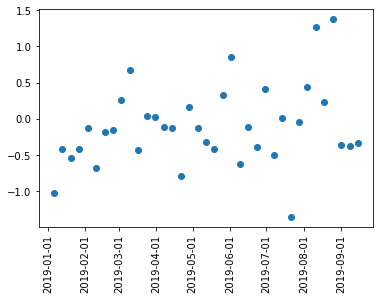

In [33]:
plt.scatter(ibm_diff.loc['2019-01-01':'2019-09-15'].index, ibm_diff.loc['2019-01-01':'2019-09-15']['diff'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

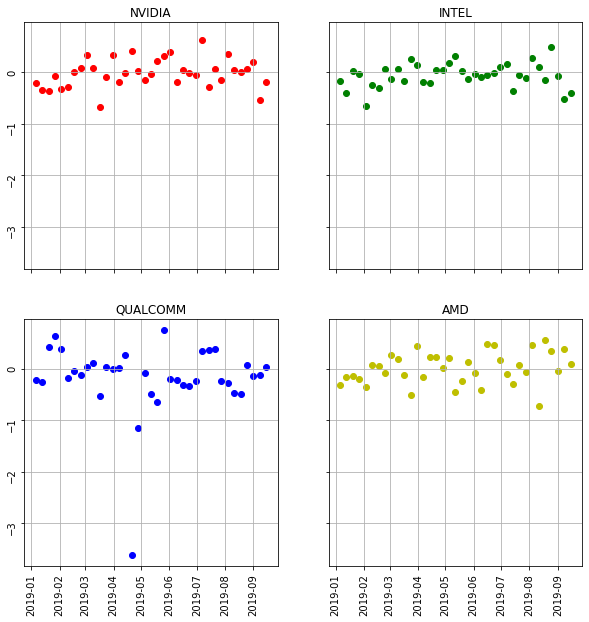

In [34]:
#Subplots
nvda['diff'] = nvda['Open'] - nvda['Close']
nvda_diff = nvda.resample('W').mean()

intc['diff'] = intc['Open'] - intc['Close']
intc_diff = intc.resample('W').mean()

qcom['diff'] = qcom['Open'] - qcom['Close']
qcom_diff = qcom.resample('W').mean()

amd['diff'] = amd['Open'] - amd['Close']
amd_diff = amd.resample('W').mean()

f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

ax[0,0].scatter(nvda_diff.loc['2019-01-01':'2019-09-15'].index, nvda_diff.loc['2019-01-01':'2019-09-15']['diff']
, color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('NVIDIA');

ax[0,1].scatter(intc_diff.loc['2019-01-01':'2019-09-15'].index, intc_diff.loc['2019-01-01':'2019-09-15']['diff']
, color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('INTEL');

ax[1,0].scatter(qcom_diff.loc['2019-01-01':'2019-09-15'].index, qcom_diff.loc['2019-01-01':'2019-09-15']['diff']
, color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('QUALCOMM');

ax[1,1].scatter(amd_diff.loc['2019-01-01':'2019-09-15'].index, amd_diff.loc['2019-01-01':'2019-09-15']['diff']
, color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('AMD');

# Step 3: Moving Windows

**Moving Average (MA):**
In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.
By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated.

**Daily Percentages**

In [35]:
daily_close_ibm = ibm[['Adj Close']]

# Daily returns
daily_pct_change_ibm = daily_close_ibm.pct_change()

# Replace NA values with 0
daily_pct_change_ibm.fillna(0, inplace=True)

daily_pct_change_ibm.head()

,Adj Close
Date,
2003-12-31,0.000000
2004-01-02,-0.012192
2004-01-05,0.016384
2004-01-06,0.000108
2004-01-07,-0.003009


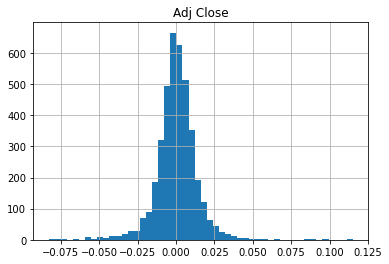

In [36]:
daily_pct_change_ibm.hist(bins=50)

# Show the plot
plt.show()

In [37]:
daily_close_nvda = nvda[['Adj Close']]

# Daily returns
daily_pct_change_nvda = daily_close_nvda.pct_change()

# Replace NA values with 0
daily_pct_change_nvda.fillna(0, inplace=True)

daily_close_intc = intc[['Adj Close']]

# Daily returns
daily_pct_change_intc = daily_close_intc.pct_change()

# Replace NA values with 0
daily_pct_change_intc.fillna(0, inplace=True)

daily_close_qcom = qcom[['Adj Close']]

# Daily returns
daily_pct_change_qcom = daily_close_qcom.pct_change()

# Replace NA values with 0
daily_pct_change_qcom.fillna(0, inplace=True)

daily_close_amd = amd[['Adj Close']]

# Daily returns
daily_pct_change_amd = daily_close_amd.pct_change()

# Replace NA values with 0
daily_pct_change_amd.fillna(0, inplace=True)

daily_pct_change_amd.head()

,Adj Close
Date,
2003-12-31,0.000000
2004-01-02,-0.002685
2004-01-05,0.022880
2004-01-06,0.026974
2004-01-07,0.003203


In [38]:
pip install seaborn

In [39]:
import seaborn as sns
sns.set()

**Seaborn** is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily. 

C:\Users\kaust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

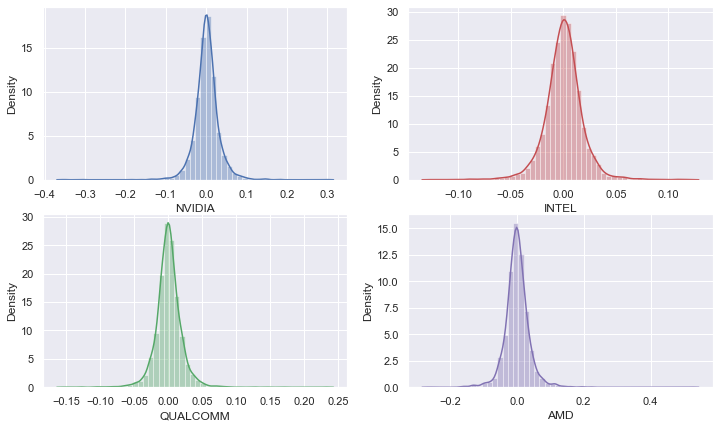

In [40]:

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 7))

# Plot a simple histogram with binsize determined automatically
sns.distplot(daily_pct_change_nvda['Adj Close'], color="b", ax=axes[0, 0], axlabel='NVIDIA');

# Plot a kernel density estimate and rug plot
sns.distplot(daily_pct_change_intc['Adj Close'], color="r", ax=axes[0, 1], axlabel='INTEL');

# Plot a filled kernel density estimate
sns.distplot(daily_pct_change_qcom['Adj Close'], color="g", ax=axes[1, 0], axlabel='QUALCOMM');

# Plot a historgram and kernel density estimate
sns.distplot(daily_pct_change_amd['Adj Close'], color="m", ax=axes[1, 1], axlabel='AMD');

# Step 4: Volatality

The most simple definition of **volatility** is a reflection of the degree to which price moves. A stock with a price that fluctuates wildly—hits new highs and lows or moves erratically—is considered highly volatile. A stock that maintains a relatively stable price has low volatility. A highly volatile stock is inherently riskier, but that risk cuts both ways. When investing in a volatile security, the chance for success is increased as much as the risk of failure. For this reason, many traders with a high-risk tolerance look to multiple measures of volatility to help inform their trade strategies.
Standard deviation is the most common way to measure market volatility, and traders can use Bollinger Bands to analyze standard deviation.

In [41]:
import numpy as np

**NumPy** is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

In [42]:
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change_ibm.rolling(min_periods).std() * np.sqrt(min_periods) 

vol.fillna(0,inplace=True)

vol.tail()

,Adj Close
Date,
2019-09-09,0.128507
2019-09-10,0.125891
2019-09-11,0.126394
2019-09-12,0.125471
2019-09-13,0.125250


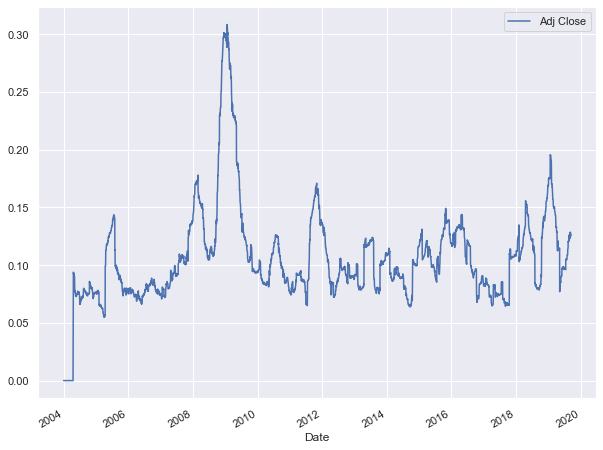

In [43]:
# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

# Rolling Means (Trends and Seasonality)

A **rolling settlement** is a method of settling asset trades on continuous days depending on the particular date on which the original trade was placed. The trades that have been completed today will have a settlement date one working day later than trades that were completed yesterday.


Pandas **dataframe.rolling()** function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time series data. In a very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.

Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size.If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes.

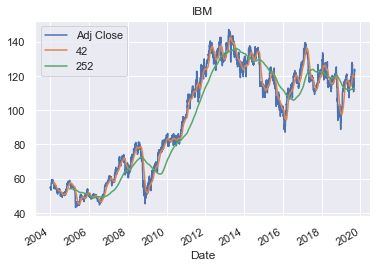

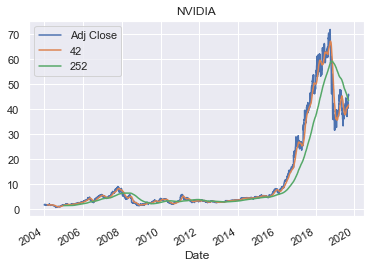

In [46]:
ibm_adj_close_px = ibm['Adj Close']
# Short moving window rolling mean
ibm['42'] = ibm_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
ibm['252'] = ibm_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
ibm[['Adj Close', '42', '252']].plot(title="IBM")

# Show plot
plt.show()

nvda_adj_close_px = nvda['Adj Close']
# Short moving window rolling mean
nvda['42'] = nvda_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
nvda['252'] = nvda_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
nvda[['Adj Close', '42', '252']].plot(title="NVIDIA")

# Show plot
plt.show()

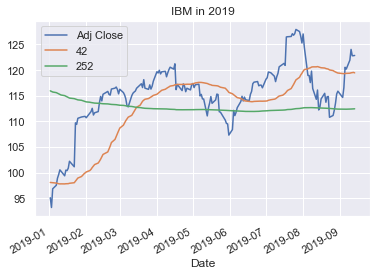

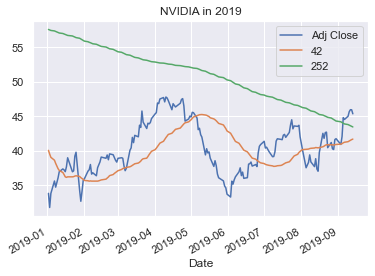

In [48]:
ibm.loc['2019-01-01':'2019-09-15'][['Adj Close', '42', '252']].plot(title="IBM in 2019");
nvda.loc['2019-01-01':'2019-09-15'][['Adj Close', '42', '252']].plot(title="NVIDIA in 2019");

# Conclusion

The above analysis can be used to understand a stock’s short-term and long-term behaviour. A decision support system can be created which stock to pick from industry for low-risk low gain or high-risk high gain depending on the risk apatite of the investor.